12 steps to Navier–Stokes
=====
***

This will be a milestone! We now get to Step 8: Burgers' equation. We can learn so much more from this equation. It plays a very important role in fluid mechanics, because it contains the full convective nonlinearity of the flow equations, and at the same time there are many known analytical solutions.


Step 8: Burgers' Equation in 2D
----
***

Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [1]:
using Plots

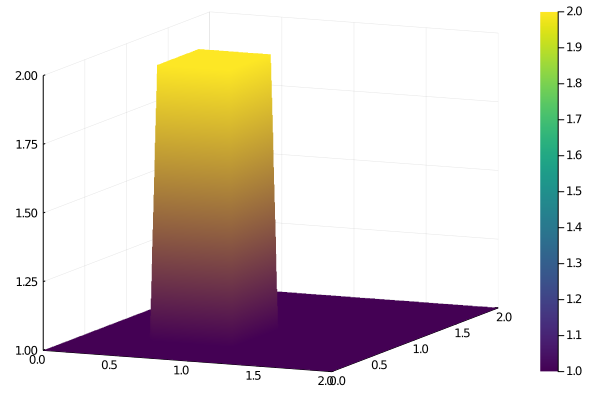

In [2]:
###variable declarations
nx = 41
ny = 41
nt = 120
c = 1
Δx = 2 / (nx-1)
Δy = 2 / (ny-1)
σ = 0.0009
ν = 0.01
Δt = σ * Δx * Δy / ν

x = range(0, stop=2, length=nx)
y = range(0, stop=2, length=ny)

u = ones(ny,nx)
v = ones(ny,nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2
v[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2

surface(x,y,u,colour=:viridis)

In [3]:
u = ones(ny,nx)
v = ones(ny,nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2
v[0.5 .≤ y .≤ 1, 0.5 .≤ x .≤ 1] .= 2

uⁿ⁺¹ = u
vⁿ⁺¹ = v

for n in 1:nt+1 ##loop across number of time steps
    uⁿ = copy(uⁿ⁺¹)
    vⁿ = copy(vⁿ⁺¹)
    
    # u and v are computed on the same grid so either u or v can be passed to size
    row, col = size(uⁿ⁺¹)
    
    for j ∈ 1:row
        for i ∈ 1:col
            # Implement boundary conditions using conditional (if/else) statements see lesson 06 for more details
            if j == 1 || j == row || i == 1 || i == col
                uⁿ⁺¹[j,i] = 1.0
                vⁿ⁺¹[j,i] = 1.0
            else
                uⁿ⁺¹[j,i] = uⁿ[j, i] - Δt/Δx*uⁿ[j, i]*(uⁿ[j, i] - uⁿ[j, i-1]) -
                            Δt/Δy*vⁿ[j, i]*(uⁿ[j, i] - uⁿ[j-1, i]) +
                            ν*Δt/Δx^2*(uⁿ[j, i+1] - 2*uⁿ[j, i] + uⁿ[j, i-1]) +
                            ν*Δt/Δy^2*(uⁿ[j+1, i] - 2*uⁿ[j, i] + uⁿ[j-1, i])
                
                vⁿ⁺¹[j,i] = vⁿ[j, i] - Δt/Δx*uⁿ[j, i]*(vⁿ[j, i] - vⁿ[j, i-1]) -
                            Δt/Δy*vⁿ[j, i]*(vⁿ[j, i] - vⁿ[j-1, i]) +
                            ν*Δt/Δx^2*(vⁿ[j, i+1] - 2*vⁿ[j, i] + vⁿ[j, i-1]) +
                            ν*Δt/Δy^2*(vⁿ[j+1, i] - 2*vⁿ[j, i] + vⁿ[j-1, i])
            end
        end
    end
end

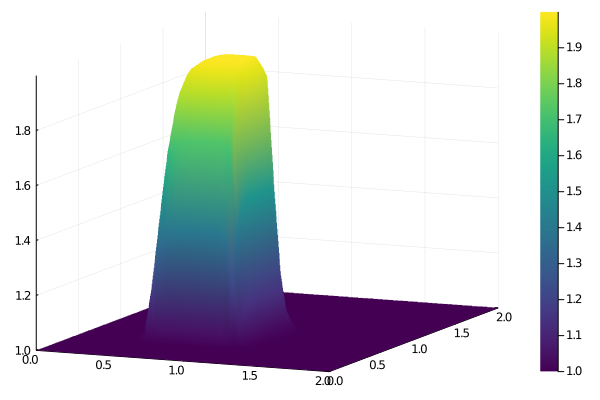

In [4]:
surface(x,y,uⁿ⁺¹,colour=:viridis)

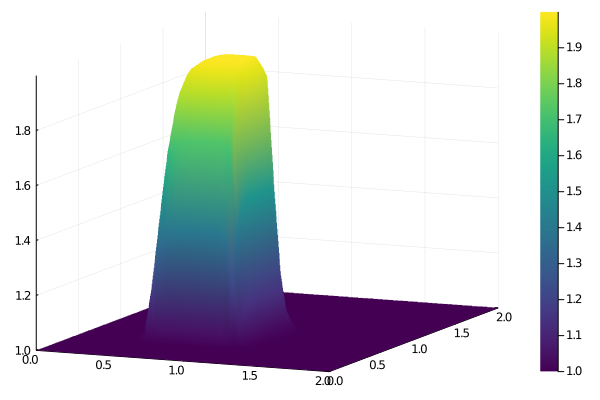

In [5]:
surface(x,y,vⁿ⁺¹,colour=:viridis)

## Learn More

The video lesson that walks you through the details for Steps 5 to 8 is **Video Lesson [6](https://youtube.com/watch?v=tUg_dE3NXoY)** on YouTube: